11493376/11490434 [==============================] - 0s 0us/step
0.735


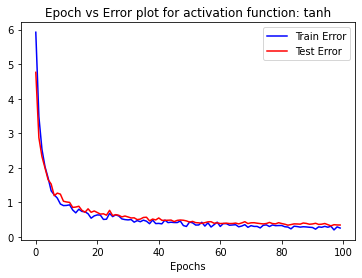

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import random
import seaborn
from keras.datasets import mnist
from keras.utils import np_utils
from sklearn.manifold import TSNE

class MyNeuralNetwork():
    """
    My implementation of a Neural Network Classifier.
    """

    acti_fns = ['relu', 'sigmoid', 'linear', 'tanh', 'softmax']
    weight_inits = ['zero', 'random', 'normal']

    def __init__(self, n_layers, layer_sizes, activation, learning_rate, weight_init, batch_size, num_epochs):
        self.n_layers=n_layers;
        self.layer_sizes=layer_sizes;
        self.activation=activation;
        self.learning_rate=learning_rate;
        self.weight_inits=weight_init;
        self.batch_size=batch_size;
        self.num_epochs=num_epochs;
        self.weight = np.zeros((n_layers), dtype=object)
        self.bias = np.zeros((n_layers), dtype = object)
        self.epochweights=np.zeros((self.num_epochs),dtype=object)
        self.activationLayerInputs=np.zeros((n_layers),dtype=object)
        if activation not in self.acti_fns:
            raise Exception('Incorrect Activation Function')
        self.activationInput=np.zeros((n_layers),dtype=object)
        self.input=np.zeros((n_layers),dtype=object);
        self.layerinput=np.zeros((n_layers),dtype=object)
        
        self.epochbias=np.zeros((self.num_epochs),dtype=object)
        self.train_error=np.zeros(self.num_epochs);self.test_error=np.zeros(self.num_epochs);
        self.lastlayer=0;
        if weight_init not in self.weight_inits:
            raise Exception('Incorrect Weight Initialization Function')
        pass

    def relu(self, X):
        a=[];
        for i in X[0]:
          if(i>0):
            a.append(i*0.1);
          else:
            a.append(0);
        a1=[];
        a1.append(a)
        a1=np.array(a1);
        return a1;

    def relu_grad(self, X):
        a=[];
        for i in X[0]:
          if(i>0):
            a.append(1);
          else:
            a.append(0);
        a1=[];
        a1.append(a)
        a1=np.array(a1);
        return a1;

    def sigmoid(self, X):
        x_calc=1/(1+np.exp(-X));
        return x_calc;

    def sigmoid_grad(self, X):
        x_calc=1/(1+np.exp(-X))
        return x_calc*(1-x_calc);

    def linear(self, X):
        Slope=0.01;
        return X*Slope;

    def linear_grad(self, X):
        slope=1;
        return np.ones(X.shape)*slope;

    def tanh(self, X):
        value=np.tanh(X);
        return value;

    def tanh_grad(self, X):
        x_calc=1-np.tanh(X)**2;
        return x_calc;

    def softmax(self, X):
        Near=np.exp(X);sumofexp=np.sum(Near);
        x_calc=Near/sumofexp;
        return x_calc;

    def softmax_grad(self, X):
        xcalc=self.softmax(X);
        return xcalc * (1 - xcalc)


    def zero_init(self, shape):
        mat=shape[0];
        data_type=shape[1];
        weight=np.zeros(mat,data_type);
        return weight;

    def random_init(self, shape):
        scaling_factor=0.01;
        mat_size=shape[0];
        datatype=shape[1];
        weight = (np.random.normal(loc = 0, scale = 1, size = (mat_size, datatype)))
        return weight;

    def normal_init(self, shape):
        scaling_factor=0.01;
        mat_size=shape[0];
        datatype=shape[1];
        weight = (np.random.normal(loc = 0, scale = 1, size = (mat_size, datatype)))
        return weight;

    def fit(self, X, Y):
        for i in range(self.n_layers):
          self.bias[i]=np.zeros((1,self.layer_sizes[i+1]))
          mat=(self.layer_sizes[i],self.layer_sizes[i+1]);
          if(self.weight_inits=='normal'):
            self.weight[i]=self.normal_init(mat);
          elif(self.weight_inits=='random'):
            self.weight[i]=self.random_init(mat);
          else:
            self.weight[i]=self.zero_init(mat);
        epoch=self.num_epochs;
        for k in range(epoch):
          sample_range=(0, len(X)-1);
          sample_range=range(sample_range[0],sample_range[1])
          batch=random.sample(sample_range,self.batch_size);
          x_batch=X[batch];y_batch=Y[batch];
          error=0;
          count=0;
          for i in x_batch:
            input1=i;
            for j in range(self.n_layers):
              #n_out is normal output i.e., output for activation
              n_out=np.dot(input1,self.weight[j]);  #dot product
              n_out+=self.bias[j];
              self.activationInput[j]=n_out;
              self.input[j]=input1;
              if(j==self.n_layers-1): #output layer
                input1=self.softmax(self.activationInput[j]);
              else:
                if(self.activation=='relu'):
                  input1=self.relu(self.activationInput[j])
                elif(self.activation=='tanh'):
                  input1=self.tanh(self.activationInput[j]);
                elif(self.activation=='softmax'):
                  input1=self.softmax(self.activationInput[j]);
                elif(self.activation=='sigmoid'):
                  input1=self.sigmoid(self.activationInput[j]);
                else:
                  input1=self.linear(self.activationInput[j]);
            #cross entropy loss
            error1=self.cross_entropy_loss(y_batch[count],input1);
            error+=error1;
            e1=self.cross_entropy_gradient(y_batch[count],input1);
            count+=1;
            
            #back propagation
            counter=self.n_layers-1;
            reverseinput="";
            while counter>-1:
              if(counter==self.n_layers-1): #for last layer
                reverseinput=self.softmax_grad(self.activationInput[counter])
                reverseinput=reverseinput*e1;
              else:
                if(self.activation=='relu'):
                  reverseinput=self.relu_grad(self.activationInput[counter])*e1
                elif(self.activation=='tanh'):
                  reverseinput=self.tanh_grad(self.activationInput[counter])*e1;
                elif(self.activation=='softmax'):
                  reverseinput=self.softmax_grad(self.activationInput[counter])*e1;
                elif(self.activation=='sigmoid'):
                  reverseinput=self.sigmoid_grad(self.activationInput[counter])*e1;
                else:
                  reverseinput=self.linear_grad(self.activationInput[counter])*e1;
              weight_Transpose=self.weight[counter].T
              e1=np.dot(reverseinput,weight_Transpose);
              input_Transpose=self.input[counter].T
              e_weight=np.dot(input_Transpose,reverseinput);
              self.bias[counter]-=self.learning_rate*reverseinput;
              self.weight[counter]-=self.learning_rate*e_weight;
              counter-=1;
          self.epochbias[k]=copy.deepcopy(self.bias);
          absolute_error=abs(error/len(y_batch));
          self.epochweights[k]=copy.deepcopy(self.weight);
          self.train_error[k]=absolute_error;
          
        return self

    def predict_proba(self, X):
        y=np.zeros(len(X),dtype=object);
        counter=0;
        for i in X:
          input1=i;
          for j in range(self.n_layers):
            n_out=np.dot(input1,self.weight[j]);
            n_out+=self.bias[j];
            if(j==self.n_layers-1):
              input1=self.softmax(n_out);
            else:
              if(self.activation=='relu'):
                  input1=self.relu(n_out);
              elif(self.activation=='tanh'):
                input1=self.tanh(n_out);
              elif(self.activation=='softmax'):
                input1=self.softmax(n_out);
              elif(self.activation=='sigmoid'):
                input1=self.sigmoid(n_out);
              else:
                input1=self.linear(n_out);
          y[counter]=input1[0]
          counter+=1;
        return y

    def predict(self, X):
        y=self.predict_proba(X);
        y_prediction=[0]*len(X);
        y_prediction=np.array(y_prediction);
        count1=0;
        for i in y:
          y_prediction[count1]=np.argmax(i);
          count1+=1;
        # return the numpy array y which contains the predicted values
        return y_prediction;

    def score(self, X, y):
        Y_pred=self.predict(X);
        y_true=np.argmax(y,axis=1)
        count=0;
        for i in range(len(y_true)):
          if y_true[i]==Y_pred[i]:
            count+=1;
        score=count/len(y);
        return score;


        # return the numpy array y which contains the predicted values
        return None
    def cross_entropy_loss(self, Y_true, Y_predicted):
      #print(Y_predicted);
      y_prediction=np.clip(Y_predicted,0.0000000001, 0.999999999);
      first=[];
      #implement -ytrue*(log(y_pred))+(1-ytrue)*(log(1-ypred));
      l1=np.log(y_prediction);        
      l2=np.log(1-y_prediction);
      first=-Y_true*l1;second=(1-Y_true)*l2;
      loss=first+second;
      loss=np.sum(loss)/len(loss);
      return loss;

    def cross_entropy_gradient(self,Y_true,Y_predicted):
      y_prediction=np.clip(Y_predicted,0.0000000001, 0.999999999);
      a1=(1-Y_true)/(1-y_prediction)
      a2=Y_true/y_prediction;
      return (a1-a2)/len(Y_true);
    
    def ErrorEpochplot(self):
        epochs=np.arange(self.num_epochs)
        train_error=self.train_error;
        plt.plot(epochs, train_error,label="Train Error",color="blue");
        test_error=self.test_error
        plt.plot(epochs,test_error,label="Test Error",color='red');
        plt.xlabel("Epochs");plt.ylabel=("Error ");
        plt.title("Epoch vs Error plot for activation function: "+self.activation);
        plt.legend()
        plt.show()
        
    def tsne_plot(self, X, Y,size):
      y=np.argmax(Y,axis=1);
      index=min(size,len(y));
      train=TSNE(n_components=2).fit_transform(X[:index]);
      ymatrix=np.mat(y[:index]);
      ymatrix=ymatrix.transpose();
      xy=np.hstack((train,ymatrix))
      xy=np.array(xy);
      seaborn.scatterplot(xy[:,0],xy[:,1],hue=xy[:,2],palette="muted");
      activation_function=self.activation;
      plt.title(activation_function+" Actionvation function used for last layer");




    def errorplot(self, X,Y):
      lastlayer=[];
      for i in range(len(Y)):
        n1=[0]*self.layer_sizes[-2];#entering number of nodes for second last layer which will be input to last layer in forward propogation
        lastlayer.append(n1);
      lastlayer=np.array(lastlayer);

      epochs=self.num_epochs;
      for i in range(epochs):
        error=0;
        counter=0;
        for j in X:
          input1=j;
          #forward prop
          for k in range(self.n_layers):
            n_out=np.dot(input1,self.epochweights[i][k]);
            n_out+=self.epochbias[i][k];
            if(k==self.n_layers-1): #output layer
                input1=self.softmax(n_out);
            else:
              if(self.activation=='relu'):
                input1=self.relu(n_out)
              elif(self.activation=='tanh'):
                input1=self.tanh(n_out);
              elif(self.activation=='softmax'):
                input1=self.softmax(n_out);
              elif(self.activation=='sigmoid'):
                input1=self.sigmoid(n_out);
              else:
                input1=self.linear(n_out);
              if(i==epochs-1 and k ==self.n_layers-2):
                lastlayer[counter]=input1;
          e1=self.cross_entropy_loss(Y[counter],input1);
          error+=e1;
          counter+=1;
        self.test_error[i]=abs(error/len(X));
      self.lastlayer=lastlayer;
      self.ErrorEpochplot();
          

      
            #cross entropy loss




(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 1, 28*28)
x_train = x_train.astype('float32')
x_train /= 255
y_train = np_utils.to_categorical(y_train)
x_test = (x_test.reshape(x_test.shape[0], 1, 28*28)).astype('float32')
x_test /= 255
y_test = np_utils.to_categorical(y_test)


layerSizes=np.array([784,256,128,64,10])
BatchSize = 500
Epochs = 100
model = MyNeuralNetwork(len(layerSizes)-1,layerSizes,'tanh', 0.1, 'normal', BatchSize, Epochs);
model.fit(x_train,y_train)
print(model.score(x_test[:3000],y_test[:3000]))
model.errorplot(x_test[:3000], y_test[:3000])

0.813


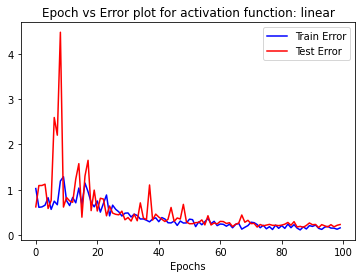

In [2]:

model1 = MyNeuralNetwork(len(layerSizes)-1,layerSizes,'linear', 0.1, 'normal', BatchSize, Epochs);
model1.fit(x_train,y_train)
print(model1.score(x_test[:3000],y_test[:3000]))
model1.errorplot(x_test[:3000], y_test[:3000])

0.9333333333333333


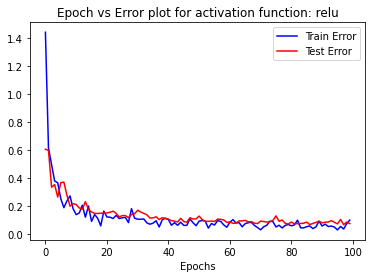

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


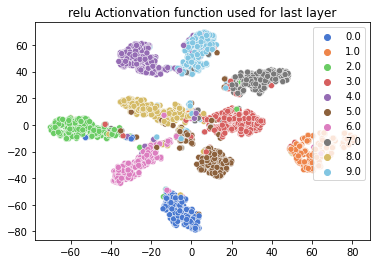

In [3]:
model2 = MyNeuralNetwork(len(layerSizes)-1,layerSizes,'relu', 0.1, 'normal', BatchSize, Epochs);
model2.fit(x_train,y_train)
print(model2.score(x_test[:3000],y_test[:3000]))
model2.errorplot(x_test[:3000], y_test[:3000])
model2.tsne_plot(model2.lastlayer,y_test[:3000],3000)

0.811


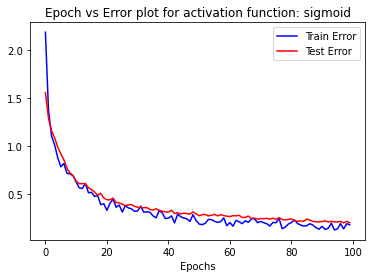

In [4]:

model3 = MyNeuralNetwork(len(layerSizes)-1,layerSizes,'sigmoid', 0.1, 'normal', BatchSize, Epochs);
model3.fit(x_train,y_train)
print(model3.score(x_test[:3000],y_test[:3000]))
model3.errorplot(x_test[:3000], y_test[:3000])

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
layerSizes=np.array([256,128,64])

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 1, 28*28)
x_train = x_train.astype('float32')
x_train /= 255
y_train = np_utils.to_categorical(y_train)
x_test = (x_test.reshape(x_test.shape[0], 1, 28*28)).astype('float32')
x_test /= 255
y_test = np_utils.to_categorical(y_test)


In [6]:
sigmoid=MLPClassifier(solver='sgd',activation='logistic',hidden_layer_sizes=layerSizes,learning_rate_init=0.1,max_iter=100,random_state=2)
sigmoid.fit(x_train,y_train)
y_pred=sigmoid.predict(x_test[:3000]);
print("Accuracy for sigmoid: ",accuracy_score(y_test[:3000],y_pred))

Accuracy for sigmoid:  0.9673333333333334


In [7]:
relu_model=MLPClassifier(solver='sgd',activation='relu',hidden_layer_sizes=layerSizes,learning_rate_init=0.1,max_iter=100,random_state=2)
relu_model.fit(x_train,y_train);
y_pred=relu_model.predict(x_test[:3000]);
print("Accuracy for relu: ",accuracy_score(y_test[:3000],y_pred))

Accuracy for relu:  0.9726666666666667


In [8]:
linear_model=MLPClassifier(solver='sgd',activation='identity',hidden_layer_sizes=layerSizes,learning_rate_init=0.01,max_iter=100,random_state=2)
linear_model.fit(x_train,y_train);
y_pred=linear_model.predict(x_test[:3000]);
print("Accuracy for linear: ",accuracy_score(y_test[:3000],y_pred))

Accuracy for linear:  0.792


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [9]:
tanh_model=MLPClassifier(solver='sgd',activation='relu',hidden_layer_sizes=layerSizes,learning_rate_init=0.1,max_iter=100,random_state=2)
tanh_model.fit(x_train,y_train);
y_pred=tanh_model.predict(x_test[:3000]);
print("Accuracy for tanh: ",accuracy_score(y_test[:3000],y_pred))

Accuracy for tanh:  0.9726666666666667
